# Table of Contents

* [Import Python Packages and Libraries](#Import-Python-Packages-and-Libraries)

* [Import Data](#Import-Data)

* [Clean Data](#Clean-Data)

* [United States Analysis](#United-States-Analysis)
    - [Cumulutaive Cases Per State](#Cumulative-Cases-Per-State-(United-States-Data))
    - [Cumulative Number of Deaths](#Cumulative-Number-of-Deaths)
    - [Testing Data](#Testing-Data)
    
    
* [World Analysis](#World-Analysis)

## Import Python Packages and Libraries

In [120]:
import io
import requests

import bokeh
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns


import folium

In [121]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

## Import Data 

In [ ]:
x = pd.read_html(
    'https://docs.google.com/'
    'spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/'
    'pubhtml#', header=1, index_col=0)

## Clean Data

In [16]:
df = x[3].copy()

cols = ['Date', 'State', 'Positive',
        'Negative', 'Pending', 'Hospitalized Currently', 
        'Hospitalized Cumulative', 'In ICU Currently', 'In ICU Cumulative',
        'On Ventilator Currently', 'On Ventilator Cumulitve',
        'Recovered', 'Deaths', 'Data Quality Grade', 'Latest Update ET'
       ]
df.columns = cols
df = df.reset_index(drop=True).dropna(how='all')
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m%d' )
df = df.sort_values('Date')

df_recent =  df.groupby('State', as_index=False).last()
df_recent.fillna(0, inplace=True)

## United States Analysis

### Cumulative Cases Per State

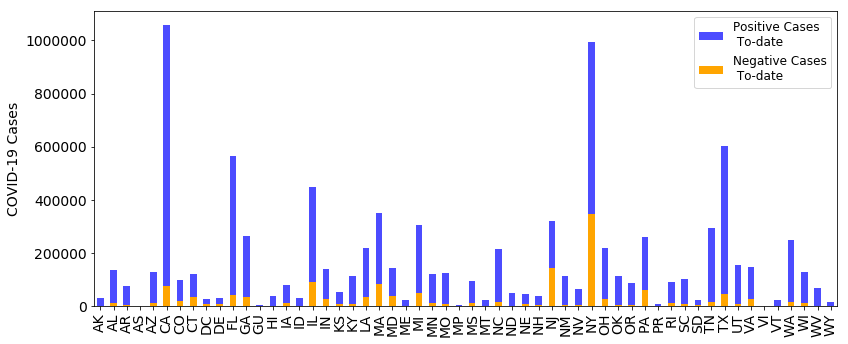

In [168]:
fig, ax = plt.subplots(figsize=(12,5))
df_recent['Negative'].plot(ax=ax, kind='bar', x='State',
                          color='blue', 
                           label='Positive Cases \n To-date',
                           alpha=.7
                          )
df_recent['Positive'].plot(ax=ax, kind='bar', x='State', 
                           color='orange',
                           label='Negative Cases\n To-date',
                          )


ax.set_xticklabels(df_recent['State'].values)
ax.set_ylabel('COVID-19 Cases')

plt.legend(prop={'size':12})
plt.tight_layout()

### Cumulative Number of Deaths

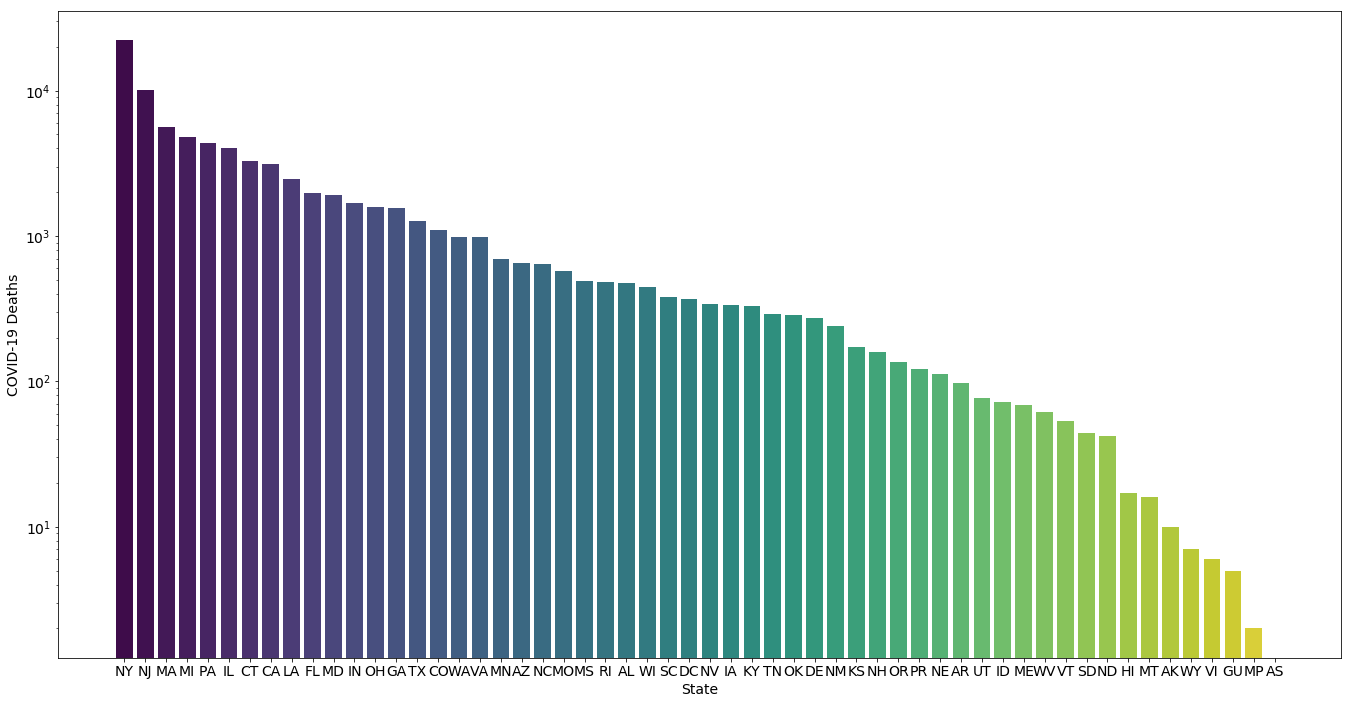

In [169]:
df_desc_recent = df_recent.sort_values(by='Deaths', ascending=False)

fig, ax = plt.subplots(figsize=(19, 10))
sns.barplot(x=df_desc_recent['State'],
            y=df_desc_recent['Deaths'],
           palette=sns.color_palette(
               plt.get_cmap('viridis_r')(np.linspace(1,0,len(df_desc_recent)))))
ax.set_ylabel(r'COVID-19 Deaths')

plt.semilogy()
plt.tight_layout()

### Testing Data

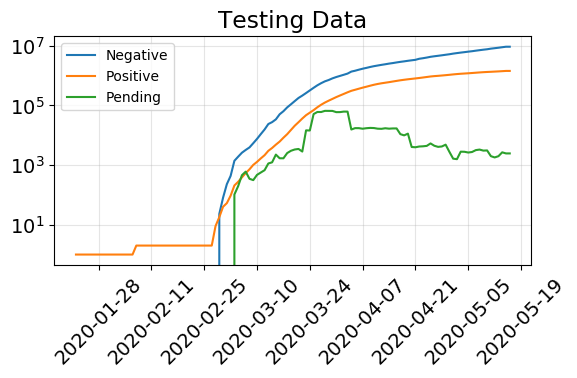

In [170]:
dfs = df.groupby('Date', as_index=False).sum()
xtickdates = pd.to_datetime('2020-02-01 2020-03-01 2020-04-01 2020-05-01'.split())

fig, ax = plt.subplots(dpi=100)
# dfs.plot(ax=ax, x='Date', y='Negative', )
# dfs.plot(ax=ax, x='Date', y='Positive', )
# dfs.plot(ax=ax, x='Date', y='Pending', )
ax.plot(dfs.Date, dfs.Negative, label='Negative')
ax.plot(dfs.Date, dfs.Positive, label='Positive')
ax.plot(dfs.Date, dfs.Pending, label='Pending')
ax.legend( prop={'size': 10})
ax.set_title(r'Testing Data')
plt.xticks(rotation=45)
plt.grid(alpha=.33)
ax.semilogy()
plt.tight_layout()
#ax.set_xticks(list(n_days))

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

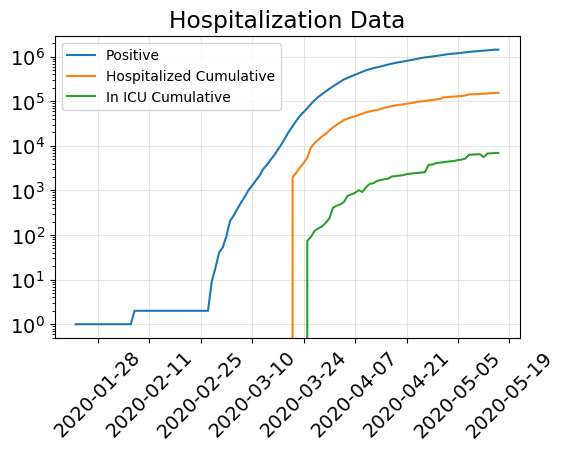

In [171]:
dfs = df.groupby('Date', as_index=False).sum()

fig, ax = plt.subplots(dpi=100)
# dfs.plot(ax=ax, x='Date', y='Negative', )
# dfs.plot(ax=ax, x='Date', y='Positive', )
# dfs.plot(ax=ax, x='Date', y='Pending', )
ax.plot(dfs.Date, dfs['Positive'], label='Positive')
ax.plot(dfs.Date, dfs['Hospitalized Cumulative'], label='Hospitalized Cumulative')
ax.plot(dfs.Date, dfs['In ICU Cumulative'], label='In ICU Cumulative')



# ax.plot(dfs.Date, dfs.Positive, label='Positive')
# ax.plot(dfs.Date, dfs.Pending, label='Pending')
ax.legend(loc='upper left', prop={'size': 10})
ax.set_title(r'Hospitalization Data')
plt.xticks(rotation=45)
plt.grid(alpha=.33)
ax.semilogy()
plt.tight_layout


### Log10(Deaths) Since the Start of the Pandemic

In [172]:
m = folium.Map(location=[40, -102], zoom_start=3)


folium.Choropleth(
    geo_data='data/us-states.json',
    data=df_map,
    columns=['State', 'log10Deaths'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.4,
    line_opacity=0.5,
    legend_name='COVID-19 log10(Deaths)',
    reset=True
).add_to(m)

## World Analysis